<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://githubtocolab.com/vmcf-konfmi/MB100T01/blob/main/advanced_image_analysis_mb100t01/02_plotting/00_Intro_matplotlib.ipynb">

# Plotting Data with Matplotlib

If running this from Google Colab, uncomment the cell below and run it. Otherwise, just skip it.

In [ ]:
#!pip install watermark

Data, be it images or object features, can and must be plotted for a better understanding of their properties or relationships. We already saw that we can use [napari]() to interactively visualize images. Sometimes, we may want to have a static view inside a notebook to consistently share with collaborators or as material in a publication.

Python has many libraries for plotting data, like [matplotlib](https://matplotlib.org/stable/gallery/index.html), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python/) and [bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html#standalone-examples), to name a few. Some libraries ship plotting function inside them as a convenience. For example, the pandas method [`.plot`](https://pandas.pydata.org/docs/user_guide/10min.html#plotting) can plot graphs directly from dataframes.

In this notebook, we will explain the basics of [Matplotlib](https://matplotlib.org/stable/gallery/index.html), probably the most flexible and traditional library to display images and data in Python.

Knowing a bit of its syntax help understanding other higher level libraries.

In [3]:
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

## Reading data

In this notebook, we will use an image and a table to plot. Let's read them.

The table contains continuous data from 2 images, identified by the last categorical column 'file_name'.

In [1]:
!wget https://github.com/vmcf-konfmi/MB100T01/raw/main/data/BBBC007_batch/20P1_POS0010_D_1UL.tif

--2024-01-24 13:48:05--  https://github.com/vmcf-konfmi/MB100T01/raw/main/data/BBBC007_batch/20P1_POS0010_D_1UL.tif
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vmcf-konfmi/MB100T01/main/data/BBBC007_batch/20P1_POS0010_D_1UL.tif [following]
--2024-01-24 13:48:05--  https://raw.githubusercontent.com/vmcf-konfmi/MB100T01/main/data/BBBC007_batch/20P1_POS0010_D_1UL.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231542 (226K) [image/tiff]
Saving to: ‘20P1_POS0010_D_1UL.tif’

20P1_POS0010_D_1UL. 100%[===================>] 226.12K  --.-KB/s    in 0.03s   

2024-01-24 13:48:05 (8.08 MB/s) - ‘20P

In [4]:
#image1 = imread("../../data/BBBC007_batch/20P1_POS0010_D_1UL.tif")
image1 = imread("20P1_POS0010_D_1UL.tif")

df = pd.read_csv("https://github.com/vmcf-konfmi/MB100T01/raw/main/data/BBBC007_analysis.csv")
#df = pd.read_csv("../../data/BBBC007_analysis.csv")

In [5]:
df.head(5)

area  intensity_mean  major_axis_length  minor_axis_length  aspect_ratio  \
0   139       96.546763          17.504104          10.292770      1.700621   
1   360       86.613889          35.746808          14.983124      2.385805   
2    43       91.488372          12.967884           4.351573      2.980045   
3   140       73.742857          18.940508          10.314404      1.836316   
4   144       89.375000          13.639308          13.458532      1.013432   

            file_name  
0  20P1_POS0010_D_1UL  
1  20P1_POS0010_D_1UL  
2  20P1_POS0010_D_1UL  
3  20P1_POS0010_D_1UL  
4  20P1_POS0010_D_1UL

## Plotting an image with matplotlib

To start, we briefly recap how we display images. You just need a single line:

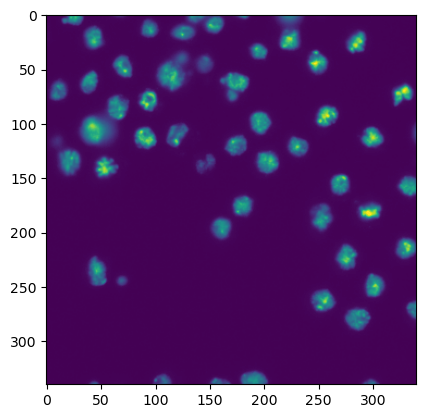

In [ ]:
plt.imshow(image1)

## Plotting a graph with matplotlib

To plot a graph with matplotlib, like a scatter plot, we need to get the data from the table and feed it to `plt.scatter`.

Let's plot the aspect_ratio vs mean_intensity.

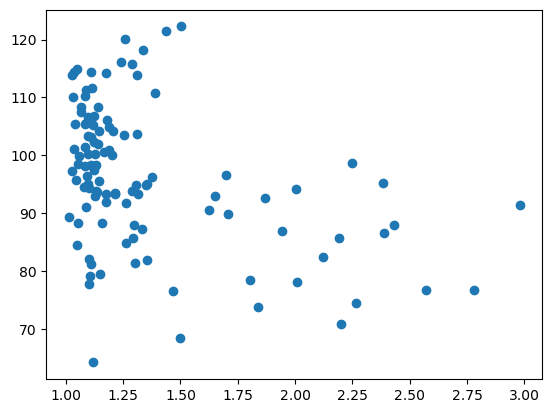

In [ ]:
x = df['aspect_ratio']
y = df['intensity_mean']

plt.scatter(x, y)

In a similar fashion, it is possible to provide extra arguments to customize plots like this. Below, we change the marker [symbol](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers), marker size (`s`), color and make marker half transparent (`alpha`).

Text(0.5, 1.0, 'Aspect Ratio vs. Intensity')

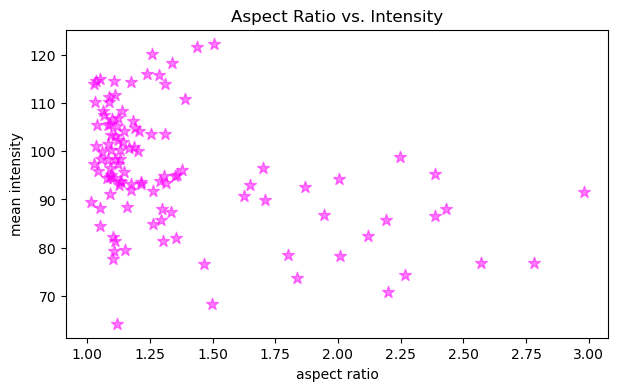

In [ ]:
figure, axes = plt.subplots(figsize=(7,4))

axes.scatter(x, y, color='magenta', marker='*', s=80, alpha=0.5)
axes.set_xlabel('aspect ratio')
axes.set_ylabel('mean intensity')
axes.set_title('Aspect Ratio vs. Intensity')

## Configuring figure and axes

Besides plotting graphs as shown above, we usually want to furhter configure the figure and its axes, like provide the names to the axes, change the figure size and maybe have more than one plot in the same figure.

To be able to do all that and more, it is necessary to have handles: variables that represent the figure and the axes objects. We can have access to them by, before plotting, creating an empty figure with the function `plt.subplots`.

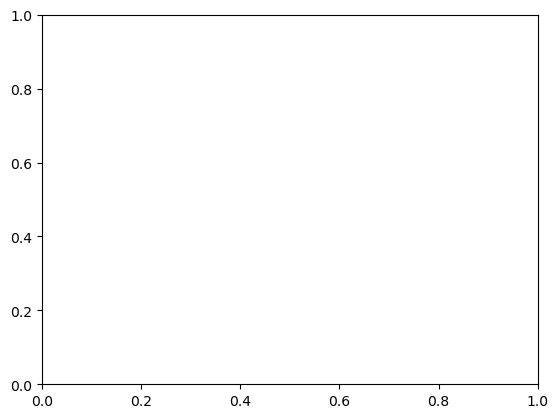

In [ ]:
figure, axes = plt.subplots()

Let's add our plot to this new figure. We now do that by passing the `scatter` function as an axes method.

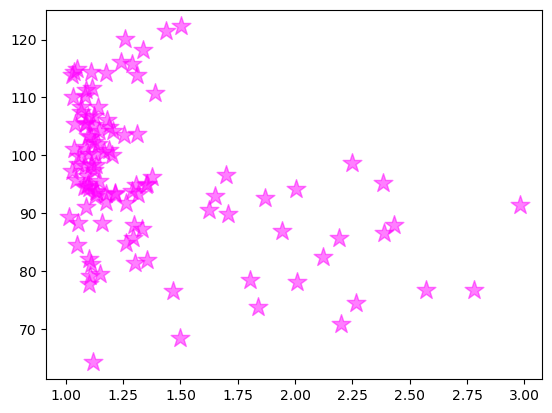

In [ ]:
figure, axes = plt.subplots()
axes.scatter(x, y, color = 'magenta', marker = '*', s = 200, alpha = 0.5)

OK, we got the same figure back, so what?

The difference is that now we have access to the figure handles! This adds a lot of editability.

Let's give axes proper names, put a title and increase the figure size.

*Note: the default figure size is [6.4, 4.8] inches (width, height)*

Text(0.5, 1.0, 'Aspect Ratio vs Intensity')

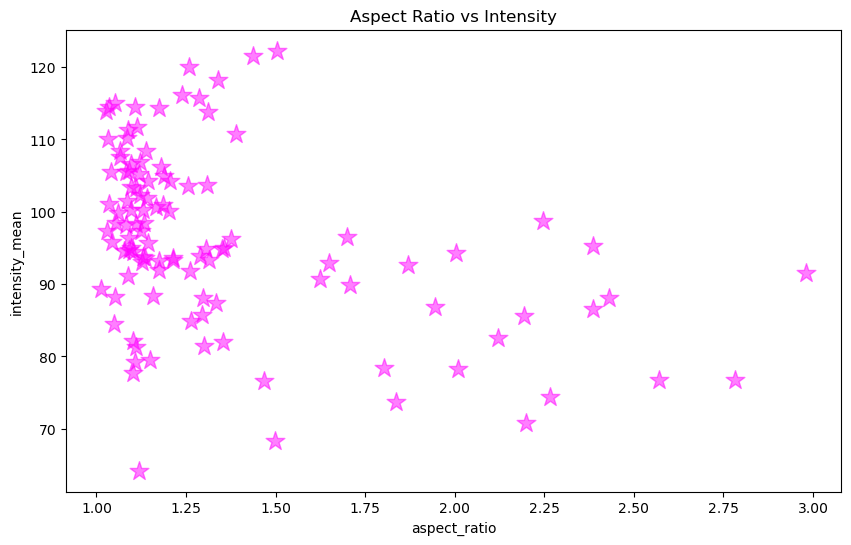

In [ ]:
figure, axes = plt.subplots(figsize = [10,6])

axes.scatter(x, y, color = 'magenta', marker = '*', s = 200, alpha = 0.5)
axes.set_xlabel('aspect_ratio')
axes.set_ylabel('intensity_mean')
axes.set_title('Aspect Ratio vs Intensity')

## Subplots

So far we are plotting one image or graph per figure containing all the data.

We could also make a grid plot by providing the number of rows and columns of the grid to `plt.subplots`

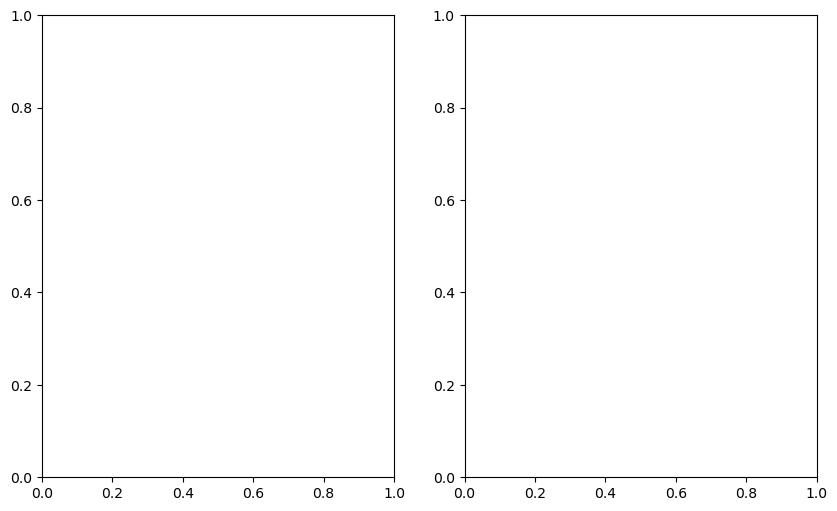

In [ ]:
figure, axes = plt.subplots(1,2, figsize = [10,6])

In [ ]:
axes

array([<Axes: >, <Axes: >], dtype=object)

Now our axes has two elements because we specified 1 row and 2 columns.



Imagine each file was a different experimental group. We can now plot the same relationship, separated by image file on different axes, but in the same figure.

First, we get data separated by 'file_name'.

In [ ]:
# Aspect ratio and intensity where 'file_name' equals first file name
x1 = df[df['file_name'] == '20P1_POS0010_D_1UL']['aspect_ratio']
y1 = df[df['file_name'] == '20P1_POS0010_D_1UL']['intensity_mean']

# Aspect ratio and intensity where 'file_name' equals second file name
x2 = df[df['file_name'] == '20P1_POS0007_D_1UL']['aspect_ratio']
y2 = df[df['file_name'] == '20P1_POS0007_D_1UL']['intensity_mean']

Then, specify an index to the axes to indicate which axis will get the plot.

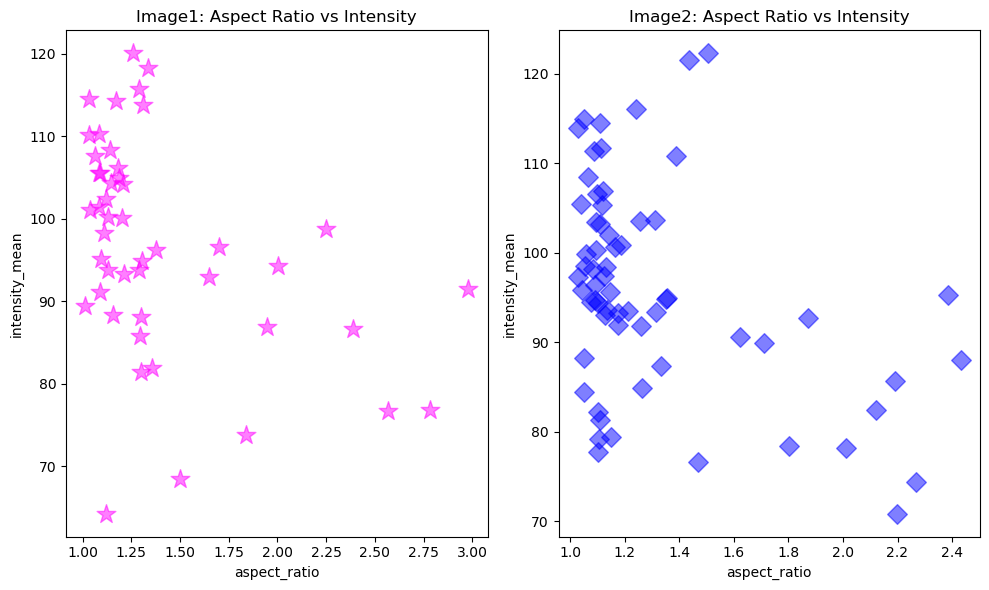

In [ ]:
# Get major_axis_length from table
major_axis_length = df['major_axis_length']
# Create empty figure and axes grid
figure, axes = plt.subplots(1,2, figsize = [10,6])

# Configure plot and properties of first axis
axes[0].scatter(x1, y1, color = 'magenta', marker = '*', s = 200, alpha = 0.5)
axes[0].set_xlabel('aspect_ratio')
axes[0].set_ylabel('intensity_mean')
axes[0].set_title('Image1: Aspect Ratio vs Intensity')

# Configure plot and properties of second axis
axes[1].scatter(x2, y2, color = 'blue', marker = 'D', s = 100, alpha = 0.5)
axes[1].set_xlabel('aspect_ratio')
axes[1].set_ylabel('intensity_mean')
axes[1].set_title('Image2: Aspect Ratio vs Intensity')

# Hint: this command in the end is very useful when axes labels overlap
plt.tight_layout()

### Saving the figure

Because we have create a figure object and assigned it to the `fig` variable, we can save the whole figure to disk by running `.savefig`.

It also allows us to export the figure as raster or vector image.

In [ ]:
figure.savefig('aspect_ratio_vs_intensity.png', dpi=300)
figure.savefig('aspect_ratio_vs_intensity_SVG.svg')

In [ ]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,matplotlib,skimage"))

Last updated: 2023-08-25T14:44:59.747389+02:00

Python implementation: CPython
Python version       : 3.9.17
IPython version      : 8.14.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

watermark : 2.4.3
numpy     : 1.23.5
pandas    : 2.0.3
matplotlib: 3.7.2
skimage   : 0.21.0

